In [1]:
# importing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#create inflation dataframe
csv_inflation_df = pd.read_csv("Inflation_Worldwide/Inflation-datahcpi_q_t.csv", encoding='latin-1')

if 'Country' in csv_inflation_df:
    csv_inflation_df['Country Name'] = csv_inflation_df['Country']
    csv_inflation_df = csv_inflation_df.drop(['Country'], axis=1)
if 'Data source' in csv_inflation_df:
    csv_inflation_df = csv_inflation_df.drop(['Data source'], axis=1)
if 'Base date' in csv_inflation_df:
    csv_inflation_df = csv_inflation_df.drop(['Base date'], axis=1)
if 'Note' in csv_inflation_df:
    csv_inflation_df = csv_inflation_df.drop(['Note'], axis=1)

csv_inflation_df = csv_inflation_df.loc[:, ~csv_inflation_df.columns.str.contains('^Unnamed')]
    
inflation_df = csv_inflation_df.drop(csv_inflation_df[csv_inflation_df.index > len(csv_inflation_df['Country Name']\
.dropna(axis=0))-1].index).dropna(axis=0, how='any').drop(['Indicator Type', 'IMF Country Code', 'Series Name'], axis=1)

inflation_df.columns = inflation_df.columns.str.replace(r'(\d)$','',regex=True)

tran_inflation_df = inflation_df.drop(['Country Code'], axis=1).set_index('Country Name').transpose()

tran_inflation_df = tran_inflation_df.groupby(level=0).mean()

In [28]:
#create food price index dataframe
csv_food_price_df = pd.read_csv("Inflation_Worldwide/Food_price_indices_data_jun889.csv")

csv_food_price_df.columns = csv_food_price_df.iloc[1]

food_price_df = csv_food_price_df.drop(index=0).drop(index=1).drop(index=2)

food_price_df = food_price_df.dropna(axis=1, how='any')

food_price_df['Date'] = food_price_df['Date'].replace(r'-(\d)(\d)$','',regex=True)

#change data types
float_col_list = [col for col in food_price_df.columns if col!='Date']

for col in float_col_list: 
    food_price_df[col] = food_price_df[col].astype('float')

#Set index to 1990
index_list = ['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']

for index in index_list: 
    food_price_df[index] = (food_price_df[index]/food_price_df[index][3]-1)*100

food_price_df = food_price_df.groupby("Date").mean()

In [29]:
#Merge Dataframes
inf_food_df = pd.merge(tran_inflation_df, food_price_df, left_index=True, right_index=True)

countries_list = inf_food_df.columns[0:len(inf_food_df.columns)-len(index_list)].values.tolist()
countries_list
inf_food_df

,Argentina,Australia,Austria,Belgium,Burkina Faso,Bahrain,Bolivia,Canada,Switzerland,Chile,...,Uruguay,United States,"Venezuela, RB",South Africa,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
1990,362.612500,7.3150,3.2550,3.3525,-0.4650,0.952500,19.245000,3.500000,8.125000,25.752500,...,110.125000,5.3850,43.677500,14.222500,-1.690068,11.103542,-20.342679,-9.386375,1.977274,-11.604096
1991,192.310000,3.2175,3.4150,3.4700,2.1150,0.752500,19.605000,2.782500,5.472500,22.030000,...,105.612500,4.2525,34.292500,15.190000,-3.185127,9.854678,-15.015576,-9.724389,9.906930,-36.879029
1992,53.207500,1.0250,3.9600,3.7450,-1.9550,-0.135000,12.552500,2.452500,2.975000,15.502500,...,69.592500,3.0300,31.417500,14.135000,-0.273011,5.608538,2.429907,-4.901196,18.845780,-36.262799
1993,15.307500,1.7375,3.6950,3.3000,0.6100,2.460000,8.842500,2.557500,2.320000,12.777500,...,54.317500,2.9500,37.965000,9.675000,-3.380135,0.908265,-9.143302,-7.917317,21.026762,-29.436860
1994,6.167500,1.9875,2.9500,2.6550,24.9725,0.897500,8.110000,2.022500,2.392500,11.445000,...,44.995000,2.6125,59.737500,8.855000,4.420177,2.633969,-11.386293,-3.380135,61.174030,-14.732651
1995,2.342500,4.5800,2.2300,2.0000,7.7875,2.592500,10.627500,1.580000,1.940000,8.240000,...,42.517500,2.8025,61.827500,8.800000,19.539782,15.304269,17.211838,10.530421,79.322718,-6.484642
1996,0.502500,2.6350,1.8650,1.6825,6.0650,-0.267500,11.285000,1.957500,-0.062500,7.402500,...,28.610000,2.9250,96.335000,7.345000,21.138846,14.146231,15.186916,30.499220,56.841968,-15.822905
1997,0.080000,0.2375,1.4625,1.1400,2.3600,2.322500,6.065000,1.367500,0.905000,6.112500,...,20.005000,2.3350,54.170000,8.650000,10.166407,7.436421,11.105919,3.783151,58.522090,-19.937429
1998,0.580000,0.8450,1.0200,0.8575,5.0200,-0.200000,7.212500,0.992500,-0.275000,5.100000,...,10.867500,1.5600,35.960000,6.962500,0.858034,-10.399637,4.236760,-8.112324,88.128878,-37.172924
1999,-0.935000,1.4925,0.5550,1.2025,-1.0250,-1.370000,2.320000,1.607500,0.830000,3.417500,...,5.695000,2.1900,23.867500,5.165000,-13.923557,-15.837875,-9.704050,-17.121685,30.580474,-55.858931


In [30]:
country = input("Country: ")

#Cumulative inflation column added
inf_food_df["Index"] = (inf_food_df[country]/inf_food_df[country]['1990']-1)*100

inf_food_df["Inflation"] = (((inf_food_df[country]/100+1).cumprod())-1)*100

inf_food_df.loc[:,['Inflation', 'Food Price Index']].head()

Country: United States


,Inflation,Food Price Index
1990,5.385000,-1.690068
1991,9.866497,-3.185127
1992,13.195452,-0.273011
1993,16.534718,-3.380135
1994,19.579187,4.420177


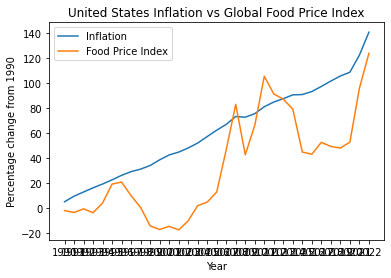

In [31]:
plt.plot(inf_food_df.index, inf_food_df['Inflation'])
plt.plot(inf_food_df.index, inf_food_df['Food Price Index'])

plt.title(f'{country} Inflation vs Global Food Price Index')
plt.xlabel("Year")
plt.ylabel("Percentage change from 1990")
plt.legend(["Inflation", "Food Price Index"])
xticks=inf_food_df.index